<a href="https://colab.research.google.com/github/mchardians/PCVK_Matrikulasi_2024/blob/main/Praktikum_1_Modul_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

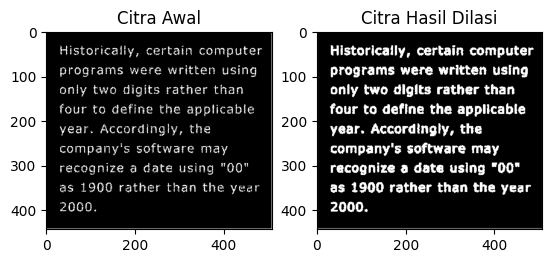

In [12]:
def dilate(image, kernel):
  kernel_size, _ = kernel.shape
  pad_size = kernel_size // 2

  height = image.shape[0]
  width = image.shape[1]

  dilated = np.zeros_like(image)
  for i in range(pad_size, height - pad_size):
    for j in range(pad_size, width - pad_size):
      dilated_pixel_formula = image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
      dilated_pixel = dilated_pixel_formula * kernel
      dilated[i, j] = np.max(dilated_pixel)

  return dilated

morphology = cv.imread('Images/morphology.png')

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype = np.uint8)

output = dilate(morphology, kernel)

plt.subplot(121)
plt.imshow(morphology)
plt.title('Citra Awal')

plt.subplot(122)
plt.imshow(output, cmap = 'gray')
plt.title('Citra Hasil Dilasi')

plt.show()

[[0 1 0]
 [1 1 1]
 [0 1 0]]


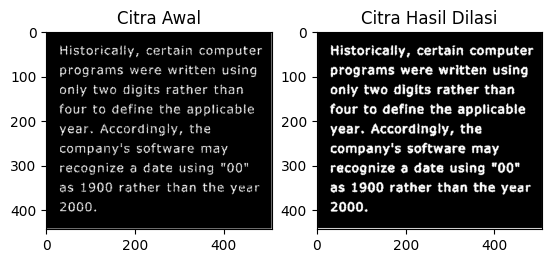

In [16]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

output = cv.dilate(morphology, kernel, iterations = 1)

print(kernel)

plt.subplot(121)
plt.imshow(morphology)
plt.title('Citra Awal')

plt.subplot(122)
plt.imshow(output)
plt.title('Citra Hasil Dilasi')
plt.show()

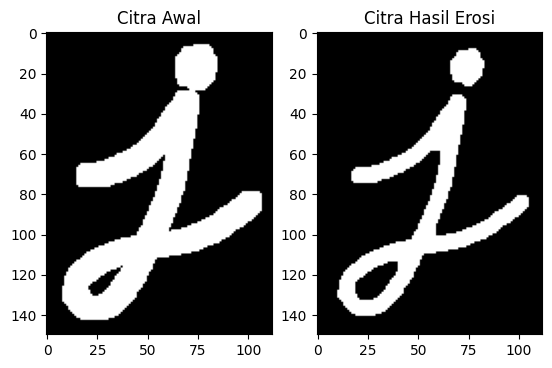

In [18]:
def erode(image, kernel):
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  height = image.shape[0]
  width = image.shape[1]

  kernel_size, _ = kernel.shape
  pad_size = kernel_size // 2

  eroded = np.zeros_like(image)

  for i in range(pad_size, height - pad_size):
    for j in range(pad_size, width - pad_size):
        eroded_pixel_formula = image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
        eroded_pixel = eroded_pixel_formula * kernel
        eroded[i, j] = np.min(eroded_pixel)

  return eroded

j = cv.imread('Images/j.png')

kernel = np.ones((5, 5), dtype = np.uint8)

output = erode(j, kernel)

plt.subplot(121)
plt.imshow(j)
plt.title('Citra Awal')

plt.subplot(122)
plt.imshow(output, cmap = 'gray')
plt.title('Citra Hasil Erosi')

plt.show()

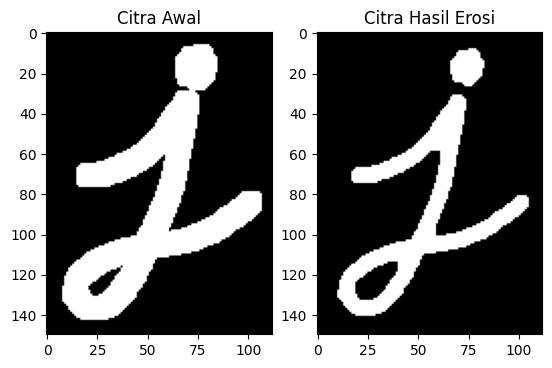

In [20]:
kernel = np.ones((5, 5), dtype = np.uint8)

output = cv.erode(j, kernel, iterations = 1)

plt.subplot(121)
plt.imshow(j)
plt.title('Citra Awal')

plt.subplot(122)
plt.imshow(output)
plt.title('Citra Hasil Erosi')

plt.show()

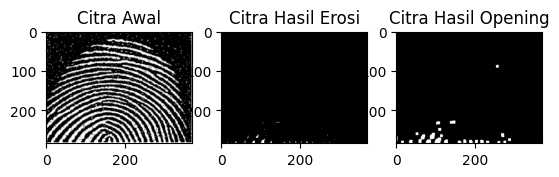

In [23]:
fingerprint = cv.imread('Images/fingerprint.png')

reto, thresho = cv.threshold(fingerprint, 127, 255, cv.THRESH_BINARY)

k = 7
kernel = np.ones((k, k), np.uint8)

erosion = cv.erode(thresho, kernel, iterations=1)
dilation = cv.dilate(erosion, kernel, iterations=1)

plt.subplot(131)
plt.imshow(fingerprint, cmap='gray')
plt.title('Citra Awal')

plt.subplot(132)
plt.imshow(erosion, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.subplot(133)
plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()

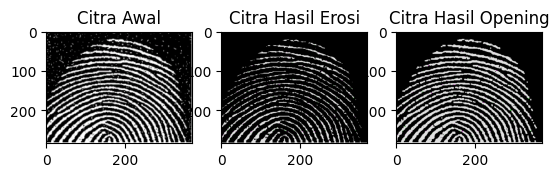

In [42]:
ret, thresh = cv.threshold(fingerprint, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(thresh, kernel, iterations=1)
openn = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel)


plt.subplot(131)
plt.imshow(fingerprint,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(132)
plt.imshow(erosion, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.subplot(133)
plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening')

plt.show()

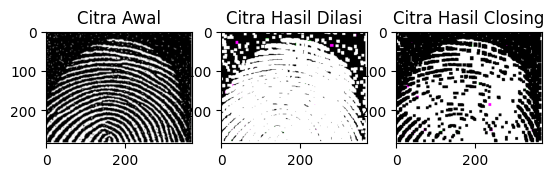

In [44]:
retc, threshc = cv.threshold(fingerprint, 127, 255, cv.THRESH_BINARY)

k = 7
kernel = cv.getStructuringElement(cv.MORPH_RECT, (k, k))
dilate = cv.dilate(threshc, kernel, iterations=1)
closing = cv.morphologyEx(threshc, cv.MORPH_CLOSE, kernel)

plt.subplot(131)
plt.imshow(fingerprint, cmap='gray')
plt.title('Citra Awal')

plt.subplot(132)
plt.imshow(dilate, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.subplot(133)
plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing')
plt.show()

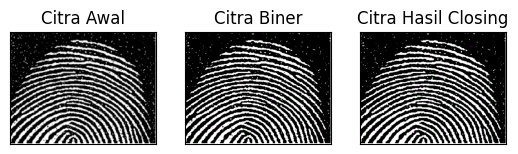

In [28]:
ret, thresh = cv.threshold(fingerprint, 127, 255, cv.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
dilate = cv.dilate(threshc, kernel, iterations=1)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

plt.subplot(131)
plt.imshow(fingerprint, cmap='gray')
plt.title('Citra Awal')

plt.subplot(132)
plt.imshow(dilate, cmap='gray')
plt.title('Citra Biner')

plt.subplot(133)
plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

SED = CROSS 3


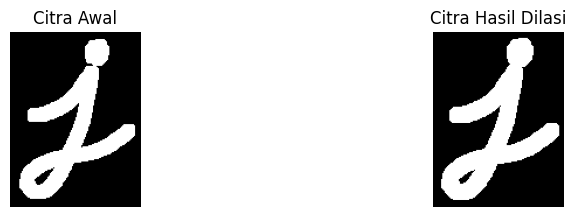

SED = CROSS 5


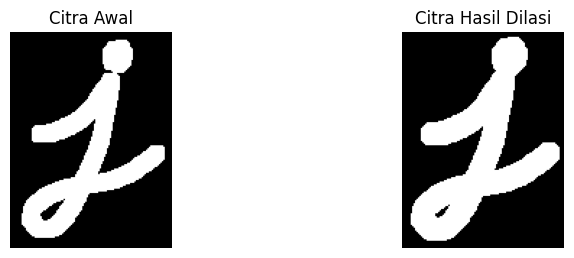

In [66]:
def process_and_display(image, struct_elem_size, title_prefix):
    struct_elem = cv.getStructuringElement(cv.MORPH_CROSS, (struct_elem_size, struct_elem_size))
    dilated_image = cv.dilate(image, struct_elem)

    return dilated_image

_, binary_image = cv.threshold(j, 128, 255, cv.THRESH_BINARY)

dilated_image_3x3 = process_and_display(binary_image, 3, 'Citra Hasil Dilasi 3x3')
dilated_image_5x5 = process_and_display(binary_image, 5, 'Citra Hasil Dilasi 5x5')

print('SED = CROSS 3')

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

print('SED = CROSS 5')

plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.tight_layout()
plt.show()

SED = Circle 3


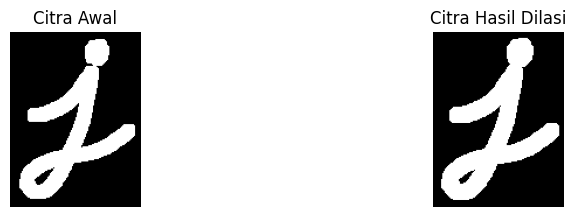

SED = Circle 5


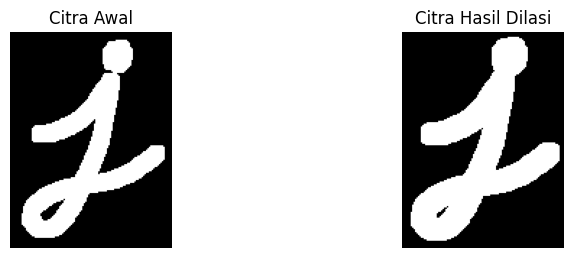

In [67]:
def process_and_display(image, struct_elem_size, shape, title_prefix):
    struct_elem = cv.getStructuringElement(shape, (struct_elem_size, struct_elem_size))
    dilated_image = cv.dilate(image, struct_elem)

    return dilated_image

_, binary_image = cv.threshold(j, 128, 255, cv.THRESH_BINARY)

dilated_image_circle_3x3 = process_and_display(binary_image, 3, cv.MORPH_ELLIPSE, 'Dilasi Circle 3x3')
dilated_image_circle_5x5 = process_and_display(binary_image, 5, cv.MORPH_ELLIPSE, 'Dilasi Circle 5x5')

print('SED = Circle 3')

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_circle_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

print('SED = Circle 5')

plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_image_circle_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.tight_layout()
plt.show()

SED = Rectangle 3 x 5
SED = Rectangle 5 x 7


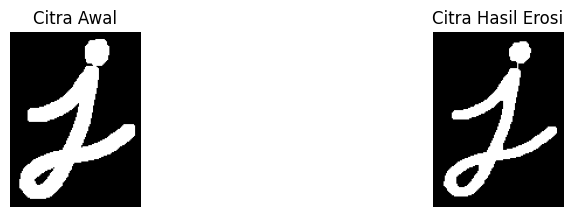

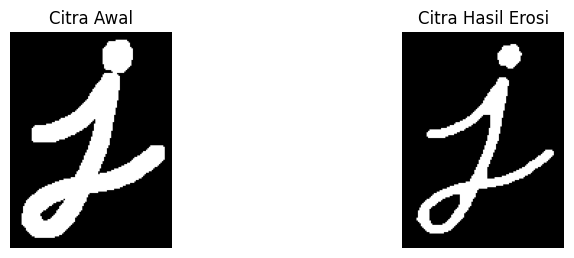

In [68]:
def process_and_display(image, struct_elem_size, shape):
    struct_elem = cv.getStructuringElement(shape, struct_elem_size)
    eroded_image = cv.erode(image, struct_elem)

    return eroded_image

_, binary_image = cv.threshold(j, 128, 255, cv.THRESH_BINARY)

eroded_image_rect_3x5 = process_and_display(binary_image, (3, 5), cv.MORPH_RECT)
eroded_image_rect_5x7 = process_and_display(binary_image, (5, 7), cv.MORPH_RECT)

print('SED = Rectangle 3 x 5')

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_rect_3x5, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

print('SED = Rectangle 5 x 7')

plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_image_rect_5x7, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.tight_layout()
plt.show()

SE = Line Vertikal 3


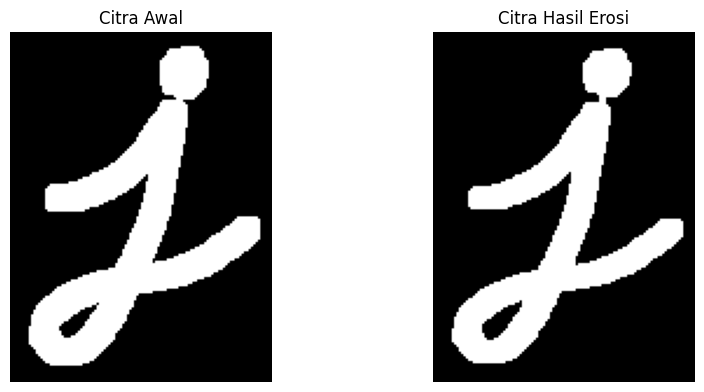

SE = Line Vertikal 5


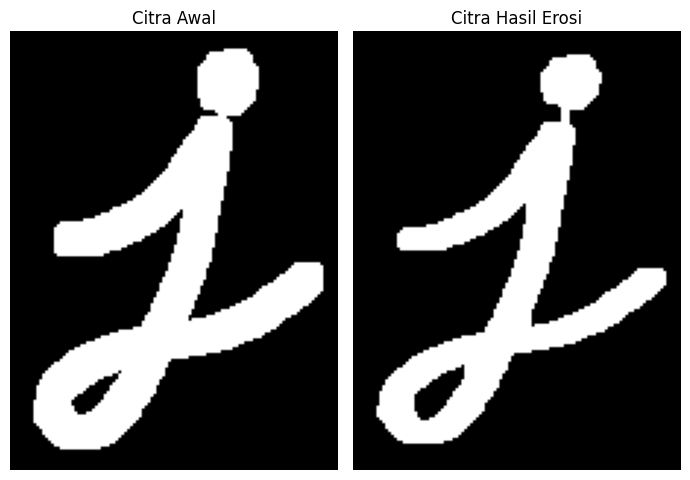

In [71]:
def process_and_display(image, struct_elem_size, title_prefix):
    struct_elem = cv.getStructuringElement(cv.MORPH_RECT, struct_elem_size)
    eroded_image = cv.erode(image, struct_elem)

    return eroded_image

_, binary_image = cv.threshold(j, 128, 255, cv.THRESH_BINARY)

eroded_image_line_3 = process_and_display(binary_image, (1, 3), 'Line Vertikal 3')
eroded_image_line_5 = process_and_display(binary_image, (1, 5), 'Line Vertikal 5')

print('SE = Line Vertikal 3')

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_line_3, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

print('SE = Line Vertikal 5')

plt.figure(figsize=(7, 10))

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_image_line_5, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.tight_layout()
plt.show()